In [1]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import zipfile
import os

zip_path = "yale face database.zip"   
extract_path = "unzipped_folder"


if os.path.exists(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print("Files extracted to:", extract_path)
        print("Contents:", os.listdir(extract_path))
    except zipfile.BadZipFile:
        print(" Error: The file is not a valid zip or is corrupted.")
else:
    print("Error: Zip file not found. Available files are:", os.listdir())


Files extracted to: unzipped_folder
Contents: ['.ipynb_checkpoints', 'data', 'Readme.txt', 'subject01.centerlight', 'subject01.glasses', 'subject01.happy', 'subject01.leftlight', 'subject01.noglasses', 'subject01.normal', 'subject01.rightlight', 'subject01.sad', 'subject01.sleepy', 'subject01.surprised', 'subject01.wink', 'subject02.centerlight', 'subject02.glasses', 'subject02.happy', 'subject02.leftlight', 'subject02.noglasses', 'subject02.normal', 'subject02.rightlight', 'subject02.sad', 'subject02.sleepy', 'subject02.surprised', 'subject02.wink', 'subject03.centerlight', 'subject03.glasses', 'subject03.happy', 'subject03.leftlight', 'subject03.noglasses', 'subject03.normal', 'subject03.rightlight', 'subject03.sad', 'subject03.sleepy', 'subject03.surprised', 'subject03.wink', 'subject04.centerlight', 'subject04.glasses', 'subject04.happy', 'subject04.leftlight', 'subject04.noglasses', 'subject04.normal', 'subject04.rightlight', 'subject04.sad', 'subject04.sleepy', 'subject04.surpris

In [4]:
images = []
labels = []


data_folder_path = os.path.join(extract_path, "data")

print(f"\nChecking for data folder at: {data_folder_path}")

if os.path.exists(data_folder_path) and os.path.isdir(data_folder_path):
    print("Data folder found. Loading images...")
    print("Files:", os.listdir(data_folder_path))

    for image_file in os.listdir(data_folder_path):
        image_path = os.path.join(data_folder_path, image_file)

        if os.path.isfile(image_path) and not image_file.startswith('.'):
            # Load the image in grayscale
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                images.append(img)

            
                label = image_file.split('.')[0]
                labels.append(label)
else:
    print(f" Error: Could not find the 'data' folder at {data_folder_path}")

# Converison to NumPy Arrays 
images = np.array(images)
labels = np.array(labels)

print(f"\nLoaded {len(images)} images with {len(np.unique(labels))} unique subjects.")
print("Subjects:", np.unique(labels))

# Flatten Images + Train/Test Split 
X = images.reshape(len(images), -1)  # Flatten 2D image → 1D vector
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Apply PCA for Dimensionality Reduction 
pca = PCA(n_components=100, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Classifiers 
# Classifier 1: Naive Bayes
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred_nb = nb.predict(X_test_pca)

print("\n Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Classifier 2: Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)

print("\n Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Checking for data folder at: unzipped_folder\data
Data folder found. Loading images...
Files: ['Readme.txt', 'subject01.centerlight', 'subject01.glasses', 'subject01.happy', 'subject01.leftlight', 'subject01.noglasses', 'subject01.normal', 'subject01.rightlight', 'subject01.sad', 'subject01.sleepy', 'subject01.surprised', 'subject01.wink', 'subject02.centerlight', 'subject02.glasses', 'subject02.happy', 'subject02.leftlight', 'subject02.noglasses', 'subject02.normal', 'subject02.rightlight', 'subject02.sad', 'subject02.sleepy', 'subject02.surprised', 'subject02.wink', 'subject03.centerlight', 'subject03.glasses', 'subject03.happy', 'subject03.leftlight', 'subject03.noglasses', 'subject03.normal', 'subject03.rightlight', 'subject03.sad', 'subject03.sleepy', 'subject03.surprised', 'subject03.wink', 'subject04.centerlight', 'subject04.glasses', 'subject04.happy', 'subject04.leftlight', 'subject04.noglasses', 'subject04.normal', 'subject04.rightlight', 'subject04.sad', 'subject04.sleepy',

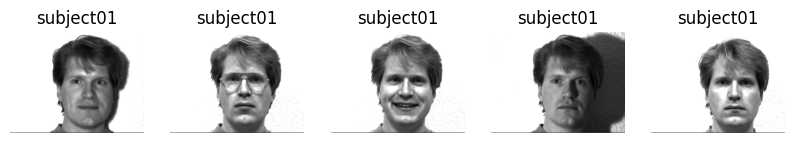

In [5]:
import matplotlib.pyplot as plt

# Show first 5 images
plt.figure(figsize=(10, 5))

for i in range(5):
    plt.subplot(1, 5, i+1)   # 1 row, 5 columns
    plt.imshow(images[i], cmap='gray')  
    plt.title(labels[i])
    plt.axis("off")

plt.show()


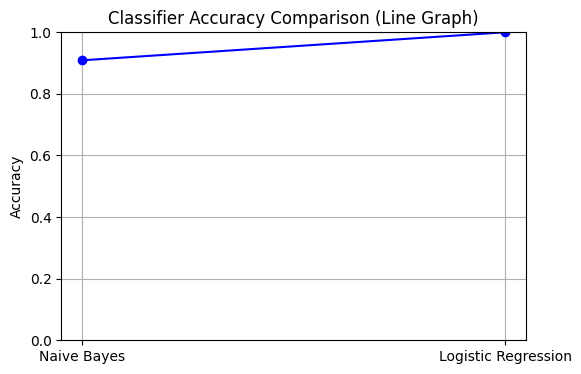

In [6]:
import matplotlib.pyplot as plt


acc_nb = accuracy_score(y_test, y_pred_nb)
acc_lr = accuracy_score(y_test, y_pred_lr)

# X-axis = classifiers, Y-axis = accuracy
classifiers = ["Naive Bayes", "Logistic Regression"]
accuracies = [acc_nb, acc_lr]

plt.figure(figsize=(6,4))
plt.plot(classifiers, accuracies, marker='o', linestyle='-', color='blue')
plt.title("Classifier Accuracy Comparison (Line Graph)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  
plt.grid(True)
plt.show()
